# LOF (Local outlier factor)

## Libs imports

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.neighbors import LocalOutlierFactor as lof

## Import Dataset

In [13]:
df = pd.read_csv("g_data.csv", delim_whitespace=True, header=None, names=["x", "y", "cluster_id"])
df.head()

,x,y,cluster_id
0,0.109393,0.085409,Cluster1
1,0.082571,0.101796,Cluster1
2,0.084990,0.113641,Cluster1
3,0.114611,0.115524,Cluster1
4,0.097356,0.095484,Cluster1


## Transform cluster_id data into colors, and store them to a new column "id"

In [14]:
df['id']=df.cluster_id.map({'Cluster1':'red', 'Cluster2':'green', 'Cluster3':'blue'})
df.head()

,x,y,cluster_id,id
0,0.109393,0.085409,Cluster1,red
1,0.082571,0.101796,Cluster1,red
2,0.084990,0.113641,Cluster1,red
3,0.114611,0.115524,Cluster1,red
4,0.097356,0.095484,Cluster1,red


## Delete column "cluster_id"

In [15]:
df2 = (df.drop(['cluster_id'], axis=1))
df2.head()

,x,y,id
0,0.109393,0.085409,red
1,0.082571,0.101796,red
2,0.084990,0.113641,red
3,0.114611,0.115524,red
4,0.097356,0.095484,red


## Visualize the data

<IPython.core.display.Javascript object>


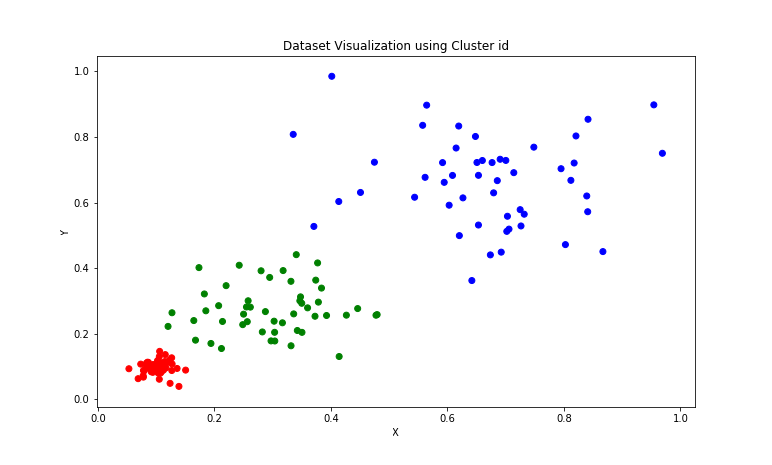

In [17]:
plt.scatter(df2.x , df2.y , c = df2.id)
plt.xlabel("Χ")
plt.ylabel("Υ")
plt.title("Dataset Visualization using Cluster id");

## Define LOF algo (n_neighbors, contamination)

In [18]:
model = lof(n_neighbors=20, contamination=0.07)
model

LocalOutlierFactor(algorithm='auto', contamination=0.07, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=None,
          n_neighbors=20, novelty=False, p=2)

## Delete "id" column and store it into "df3"

In [19]:
df3 = (df2.drop(['id'], axis=1))
df3.head()

,x,y
0,0.109393,0.085409
1,0.082571,0.101796
2,0.084990,0.113641
3,0.114611,0.115524
4,0.097356,0.095484


## Fit the model to the clean data

In [20]:
label_outliers= (model.fit_predict(df3))
label_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## Visualize the data with the outliers/anomalies found by the LOF algorithm

<IPython.core.display.Javascript object>


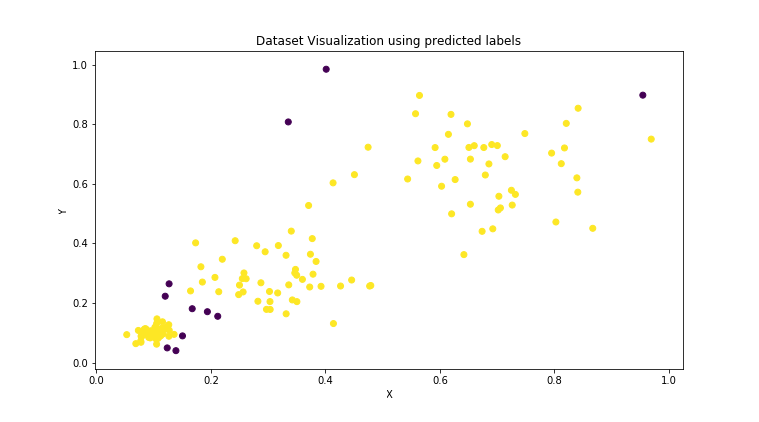

In [21]:
plt.scatter(df3.x , df3.y , c=label_outliers)
plt.xlabel("Χ")
plt.ylabel("Υ")
plt.title("Dataset Visualization using predicted labels");

## Create new column and store the scores found by the LOF algo

In [22]:
df3['scores'] = model.negative_outlier_factor_
df3.head()

,x,y,scores
0,0.109393,0.085409,-1.003808
1,0.082571,0.101796,-1.016835
2,0.084990,0.113641,-1.029678
3,0.114611,0.115524,-1.007342
4,0.097356,0.095484,-0.967063


## Scores that are near to -1 value are considered normal data points, while smaller score values are anomalies

In [23]:
model.negative_outlier_factor_

array([-1.00380763, -1.01683533, -1.02967782, -1.00734166, -0.96706344,
       -1.01434349, -0.9590511 , -1.2952214 , -0.97791989, -1.15755079,
       -0.95178085, -1.04973236, -1.1265852 , -1.49238866, -0.93987277,
       -0.97037049, -1.50400888, -1.02387354, -1.21419193, -1.25846419,
       -1.02380191, -0.95437123, -1.18896265, -1.13167501, -1.00002339,
       -1.67451729, -0.95731137, -0.97064429, -1.23165039, -1.80104619,
       -1.00031292, -0.99023152, -1.32966878, -0.97030526, -1.026465  ,
       -0.95316358, -0.95614898, -1.02714542, -1.11396408, -1.02456282,
       -1.05333996, -1.48579501, -0.99368454, -1.04142847, -1.01250529,
       -0.98843505, -1.11634346, -1.07923538, -0.99919899, -2.24381852,
       -1.766151  , -1.27449632, -1.12692904, -0.97432168, -1.27820199,
       -0.9704888 , -0.96644738, -1.02276772, -1.00755715, -0.94016282,
       -1.02579493, -0.99646179, -1.06202271, -0.97717106, -1.00981192,
       -1.07288422, -1.19450986, -1.08357173, -1.30769533, -0.95

## Filter the data points based on their score

In [36]:
def filter_scores(x):
    if x > -1.4:
        return 1
    else:
        return -1
df3['outliers_based_on_score'] = df3.apply(lambda row: filter_scores(row['scores']), axis=1)

<IPython.core.display.Javascript object>


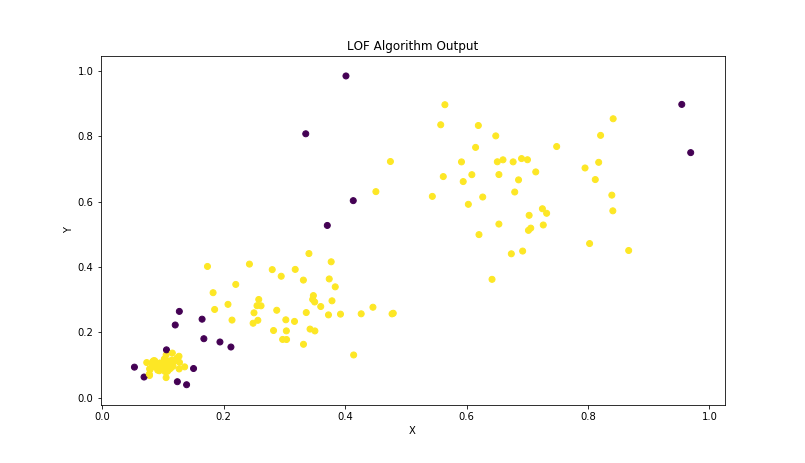

In [38]:
plt.scatter(df3.x, df3.y, c=df3.outliers_based_on_score)
plt.xlabel("Χ")
plt.ylabel("Υ")
plt.title("LOF Algorithm Output");

## Remove the data points which have a score lower than -1.4 and visualize the remaining data

In [39]:
filtered_data_based_on_score = df3.loc[df3['scores'] > -1.4]

clean_data = (filtered_data_based_on_score.drop(['scores', 'outliers_based_on_score'], axis=1))

<IPython.core.display.Javascript object>


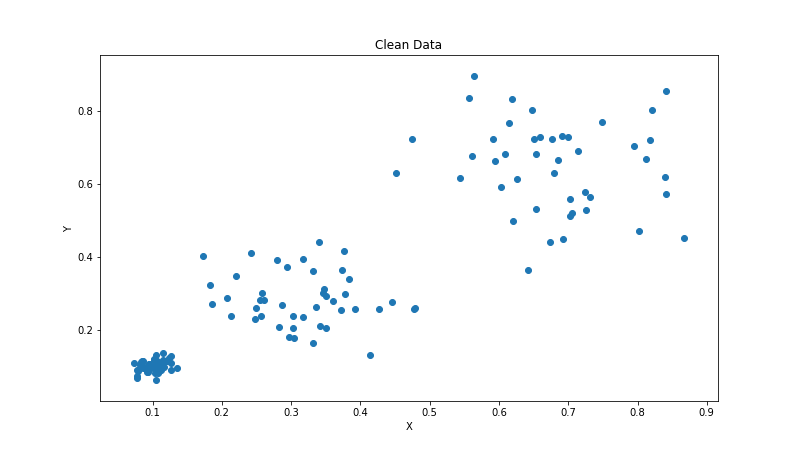

In [41]:
plt.scatter(clean_data.x, clean_data.y,)
plt.xlabel("Χ")
plt.ylabel("Υ")
plt.title("Clean Data");